In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging

logging.getLogger('jieba').setLevel(logging.WARN)
logging.getLogger('fgclassifier').setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os

os.chdir('..')

In [3]:
from collections import defaultdict
from sklearn.model_selection import train_test_split

from fgclassifier.utils import read_data, get_dataset

X_train, y_train = read_data(get_dataset('train_en'), flavor=None)
X_test, y_test = read_data(get_dataset('valid_en'), flavor=None)

2018-12-03 21:50:11,147 [INFO] Reading data/english_train.csv..
2018-12-03 21:50:11,375 [INFO] Reading data/english_valid.csv..


In [4]:
fm = defaultdict(dict)

In [5]:
from fgclassifier.features import FeaturePipeline, logger

for name in ['word2vec_en', 'word2vec_en_minmax']:
    logger.info(f'Building features for {name}...')
    model = FeaturePipeline.from_spec(name, cache=fm)
    model.fit_transform(X_train)
    model.transform(X_test)

C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2018-12-03 21:50:12,600 [INFO] 'pattern' package not found; tag filters are not available for English
2018-12-03 21:50:12,627 [INFO] Building features for word2vec_en...
2018-12-03 21:50:30,054 [INFO] collecting all words and their counts
2018-12-03 21:50:30,056 [INFO] PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-03 21:50:30,742 [INFO] collected 23515 word types from a corpus of 1877982 raw words and 8000 sentences
2018-12-03 21:50:30,744 [INFO] Loading a fresh vocabulary
2018-12-03 21:50:30,887 [INFO] effective_min_count=3 retains 10128 unique words (43% of original 23515, drops 13387)
2018-12-03 21:50:30,890 [INFO] effective_min_count=3 leaves 1861693 word corpus (99% of original 1877982, drops 16289)
2018-12-03 21:50:30,983 [INFO] deleting th

2018-12-03 21:51:07,443 [INFO] EPOCH 10 - PROGRESS: at 82.66% examples, 346100 words/s, in_qsize 6, out_qsize 0
2018-12-03 21:51:07,966 [INFO] worker thread finished; awaiting finish of 2 more threads
2018-12-03 21:51:07,979 [INFO] worker thread finished; awaiting finish of 1 more threads
2018-12-03 21:51:07,981 [INFO] worker thread finished; awaiting finish of 0 more threads
2018-12-03 21:51:07,983 [INFO] EPOCH - 10 : training on 1877982 raw words (1291265 effective words) took 3.6s, 357866 effective words/s
2018-12-03 21:51:07,986 [INFO] training on a 18779820 raw words (12913869 effective words) took 36.5s, 354134 effective words/s
2018-12-03 21:51:56,497 [INFO] Building features for word2vec_en_minmax...
2018-12-03 21:51:56,499 [INFO]   word2vec_en: fit_transform use cache.
2018-12-03 21:51:56,542 [INFO]   word2vec_en: transform use cache.


In [6]:
scores_train, avg_score_train = defaultdict(dict), defaultdict(dict)
scores_test, avg_score_test = defaultdict(dict), defaultdict(dict)
models = {}

In [7]:
from fgclassifier.train import fm_cross_check
from IPython.display import clear_output

In [9]:
conf = {
    'fm_cache': fm,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'results': {
        'models': models,
        'avg': avg_score_test,
        'all': scores_test,
        'avg_train': avg_score_train,
        'all_train': scores_train,
    }
}

# All other models can run on many classifiers
results = fm_cross_check(
    ['word2vec_en_minmax'],
    ['ComplementNB', 'QDA', 'LDA', 'LinearSVC', 'Ridge', 'Logistic'], **conf)


clear_output()

2018-12-03 22:02:12,430 [INFO] 
2018-12-03 22:02:12,431 [INFO] ============ Feature Model: word2vec_en_minmax ============
2018-12-03 22:02:12,433 [INFO] 
2018-12-03 22:02:12,434 [INFO] Train for word2vec_en_minmax -> ComplementNB...
2018-12-03 22:02:12,436 [INFO]   word2vec_en_minmax: fit_transform use cache.
2018-12-03 22:02:13,105 [INFO]   word2vec_en_minmax: transform use cache.
2018-12-03 22:02:13,726 [INFO] [Validate]: F1 Scores
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
2018-12-03 22:02:13,732 [INFO]   location_traffic_convenience            	0.3197
2018-12-03 22:02:13,736 [INFO]   location_distance_from_business_district	0.2802
2018-12-03 22:02:13,740 [INFO]   location_easy_to_find                   	0.2877
2018-12-03 22:02:13,744 [INFO]   service_wait_time                       	

2018-12-03 22:02:49,041 [INFO]   service_parking_convenience             	0.2414
2018-12-03 22:02:49,053 [INFO]   service_serving_speed                   	0.5910
2018-12-03 22:02:49,061 [INFO]   price_level                             	0.8272
2018-12-03 22:02:49,070 [INFO]   price_cost_effective                    	0.4032
2018-12-03 22:02:49,077 [INFO]   price_discount                          	0.5946
2018-12-03 22:02:49,087 [INFO]   environment_decoration                  	0.5949
2018-12-03 22:02:49,097 [INFO]   environment_noise                       	0.3900
2018-12-03 22:02:49,109 [INFO]   environment_space                       	0.7904
2018-12-03 22:02:49,122 [INFO]   environment_cleaness                    	0.3936
2018-12-03 22:02:49,133 [INFO]   dish_portion                            	0.7763
2018-12-03 22:02:49,147 [INFO]   dish_taste                              	0.4079
2018-12-03 22:02:49,153 [INFO]   dish_look                               	0.3597
2018-12-03 22:02:49,160 [INF

C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

2018-12-03 22:16:16,027 [INFO]   location_distance_from_business_district	0.2767
2018-12-03 22:16:16,030 [INFO]   location_easy_to_find                   	0.3441
2018-12-03 22:16:16,034 [INFO]   service_wait_time                       	0.2859
2018-12-03 22:16:16,038 [INFO]   service_waiters_attitude                	0.4972
2018-12-03 22:16:16,042 [INFO]   service_parking_convenience             	0.2847
2018-12-03 22:16:16,046 [INFO]   service_serving_speed                   	0.3589
2018-12-03 22:16:16,051 [INFO]   price_level                             	0.4495
2018-12-03 22:16:16,056 [INFO]   price_cost_effective                    	0.3254
2018-12-03 22:16:16,061 [INFO]   price_discount                          	0.4355
2018-12-03 22:16:16,066 [INFO]   environment_decoration                  	0.3824
2018-12-03 22:16:16,072 [INFO]   environment_noise                       	0.3475
2018-12-03 22:16:16,077 [INFO]   environment_space                       	0.3391
2018-12-03 22:16:16,082 [INF

2018-12-03 22:16:40,245 [INFO] [Validate]: F1 Scores
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
2018-12-03 22:16:40,252 [INFO]   location_traffic_convenience            	0.3790
2018-12-03 22:16:40,256 [INFO]   location_distance_from_business_district	0.2762
2018-12-03 22:16:40,261 [INFO]   location_easy_to_find                   	0.3402
2018-12-03 22:16:40,265 [INFO]   service_wait_time                       	0.3345
2018-12-03 22:16:40,270 [INFO]   service_waiters_attitude                	0.5463
2018-12-03 22:16:40,275 [INFO]   service_parking_convenience             	0.3589
2018-12-03 22:16:40,281 [INFO]   service_serving_speed                   	0.3954
2018-12-03 22:16:40,287 [INFO]   price_level                             	0.4642
2018-12-03 22:16:40,293 [INFO]   price_cost_effective  

C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\daal4sklearn\svm.py:332: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\daal4sklearn\svm.py:332: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jyyjc\Anaconda3\envs\idp\lib\site-packages\sklearn\daal4sklearn\svm.py:332: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jyyjc\Anaconda3\env

KeyboardInterrupt: 

In [13]:
import pandas as pd

rows = {}
for fm_name in scores_test:
    for clf_name in scores_test[fm_name]:
        key = f'{fm_name}.{clf_name}'
        rows[key] = [avg_score_test[fm_name][clf_name],
                     *scores_test[fm_name][clf_name]]
df = pd.DataFrame(rows)
df.index = ['average', *y_train.columns]
df = df.T.sort_values('average', ascending=False)
df

,average,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,price_cost_effective,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
word2vec_en_minmax.LDA,0.423707,0.404234,0.297101,0.413403,0.372701,0.548584,0.510250,0.448026,0.459344,0.381569,...,0.434870,0.430402,0.391942,0.445335,0.396624,0.503967,0.293774,0.366491,0.454969,0.458624
word2vec_en_minmax.Logistic,0.359515,0.367095,0.266136,0.319081,0.309354,0.535512,0.318867,0.323902,0.423160,0.314899,...,0.364978,0.315705,0.303494,0.344318,0.345218,0.510168,0.261511,0.282828,0.455893,0.400758
word2vec_en_minmax.LinearSVC,0.343691,0.374133,0.260035,0.325124,0.290902,0.515057,0.321375,0.314986,0.401218,0.312315,...,0.370764,0.310624,0.297478,0.320857,0.319912,0.413814,0.247623,0.276184,0.439601,0.350484
word2vec_en_minmax.Ridge,0.337894,0.380132,0.268824,0.332146,0.266547,0.485127,0.299694,0.300912,0.406461,0.321275,...,0.377706,0.341273,0.324489,0.336534,0.317322,0.343614,0.238687,0.290172,0.396463,0.327296
word2vec_en_minmax.QDA,0.317270,0.316271,0.293552,0.308596,0.235590,0.445468,0.242002,0.313813,0.369126,0.295103,...,0.338942,0.291881,0.322473,0.288436,0.336015,0.304377,0.278640,0.272854,0.412886,0.300770
word2vec_en_minmax.ComplementNB,0.300160,0.318867,0.280693,0.294363,0.258492,0.373400,0.237046,0.278545,0.351026,0.288827,...,0.312807,0.298025,0.286776,0.304807,0.293393,0.337226,0.268108,0.256179,0.309436,0.316079


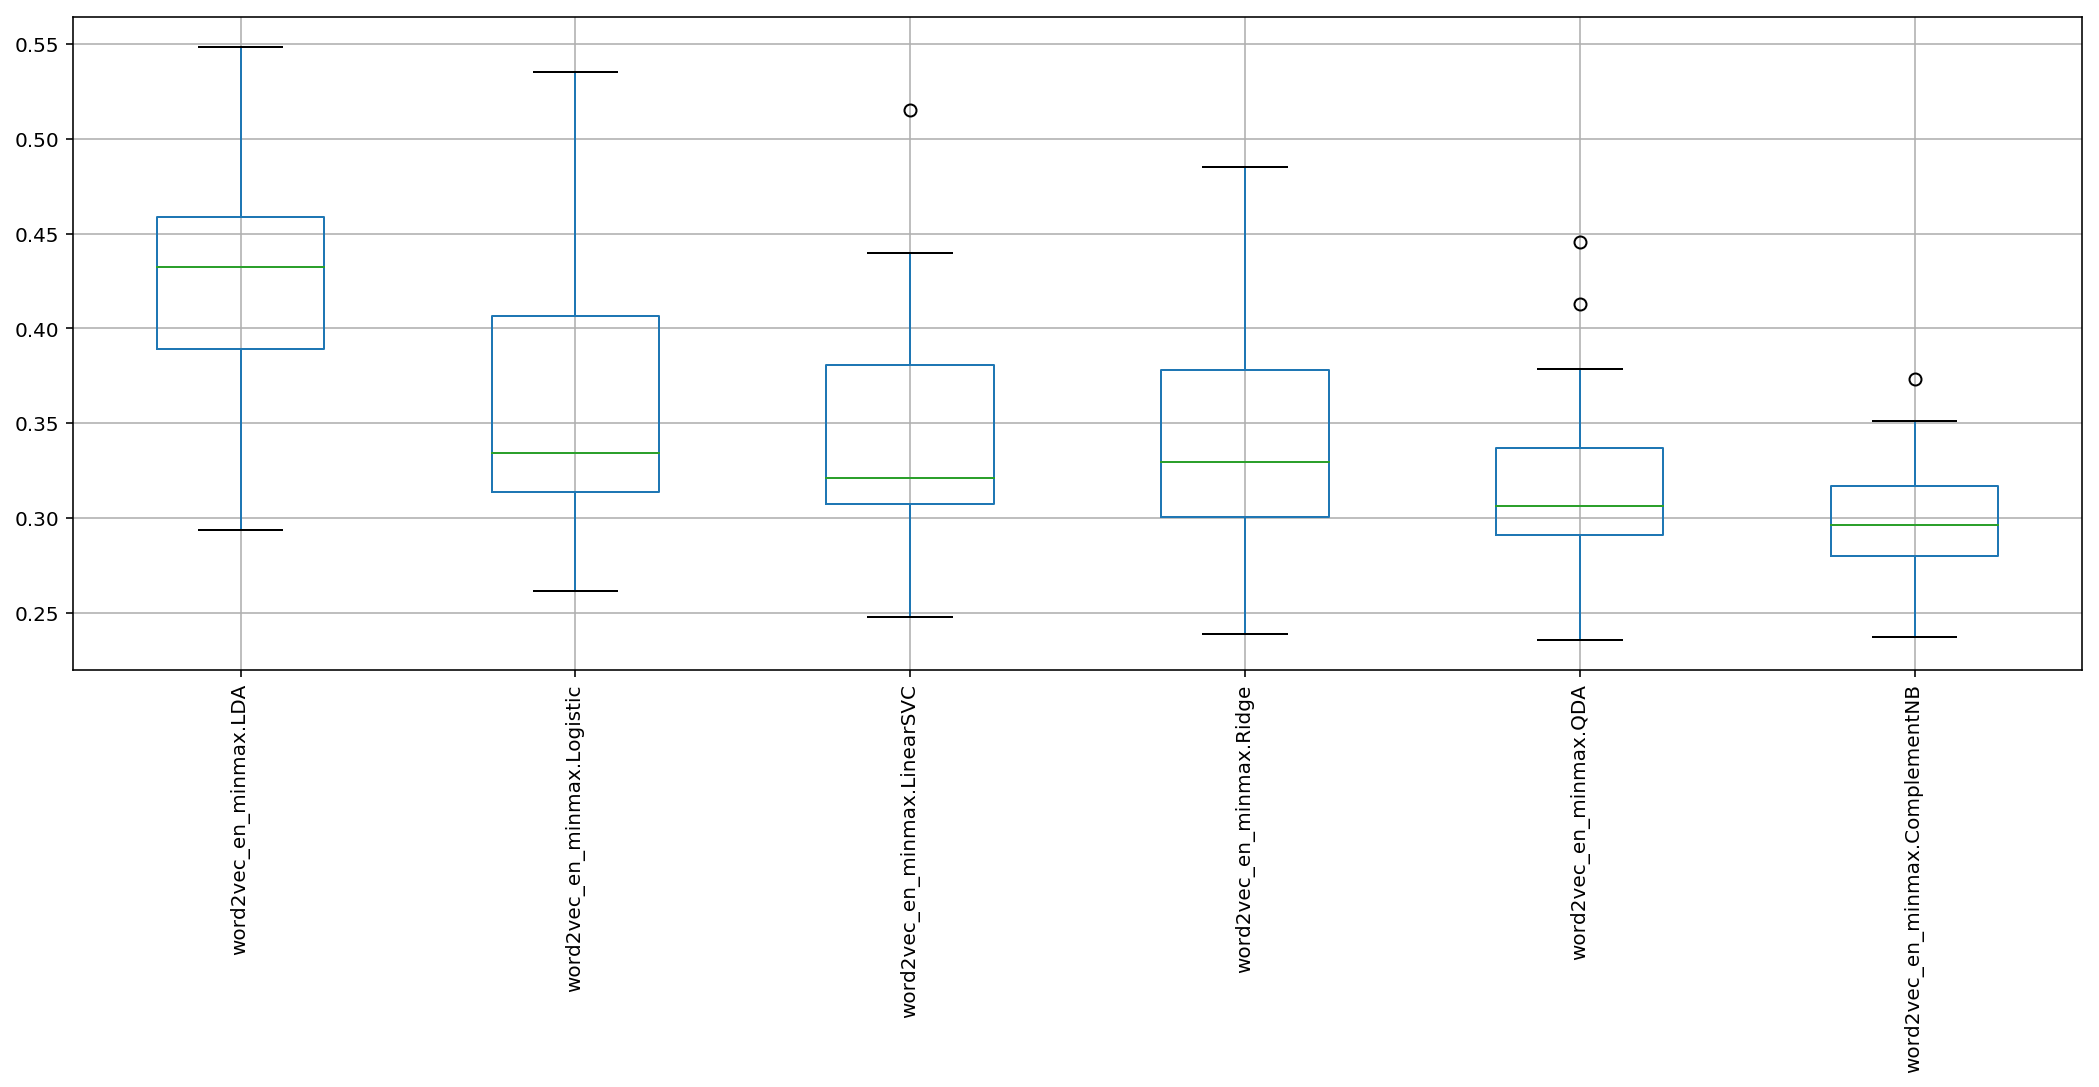

In [17]:
import matplotlib.pyplot as plt

df.T.drop(['average']).boxplot(
    figsize=(18, 6), rot=90)

plt.show()

In [19]:
from fgclassifier.utils import save_model

def clear_cache(model):
    if hasattr(model, 'steps'):
        for (name, step) in model.steps:
            clear_cache(step)
    if hasattr(model, 'cache'):
        model.cache = None
    return model

for name, model in conf['results']['models'].items():
    clear_cache(model)
    save_model(model)

2018-12-03 22:55:29,385 [INFO] Saving model to data/models/word2vec_en_minmax_ComplementNB.pkl...
2018-12-03 22:55:30,542 [INFO] Saving model... Done.
2018-12-03 22:55:30,543 [INFO] Saving model to data/models/word2vec_en_minmax_QDA.pkl...
2018-12-03 22:55:31,522 [INFO] Saving model... Done.
2018-12-03 22:55:31,524 [INFO] Saving model to data/models/word2vec_en_minmax_LDA.pkl...
2018-12-03 22:55:32,368 [INFO] Saving model... Done.
2018-12-03 22:55:32,369 [INFO] Saving model to data/models/word2vec_en_minmax_LinearSVC.pkl...
2018-12-03 22:55:33,314 [INFO] Saving model... Done.
2018-12-03 22:55:33,315 [INFO] Saving model to data/models/word2vec_en_minmax_Ridge.pkl...
2018-12-03 22:55:34,197 [INFO] Saving model... Done.
2018-12-03 22:55:34,199 [INFO] Saving model to data/models/word2vec_en_minmax_Logistic.pkl...
2018-12-03 22:55:35,005 [INFO] Saving model... Done.
